In [24]:
# ==========================
# Import Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# ==========================
# Load Dataset
# ==========================
df = pd.read_csv("sleeptime_prediction_dataset.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
    WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75          3  
1            0.67          4  
2            0.35          3  
3            1.21          4  
4            0.95          5  


In [26]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB
None


In [27]:
#Data quality checks
#-------------------------------------
#check for missing values
print("\nNull Values per Column:")
print(df.isnull().sum())      


Null Values per Column:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


In [28]:
#check for duplicate values
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [29]:
#check unique values in each column
print("\nUniqueValues per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


UniqueValues per Column:
WorkoutTime: 300
ReadingTime: 201
PhoneTime: 394
WorkHours: 581
CaffeineIntake: 1939
RelaxationTime: 201
SleepTime: 8


In [30]:
#show basic statistics for each column
print(df.describe())

       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  
count     2000.000000  2000.000000  
mean         1.010955     4.328500  
std          0.582619     1.239498  
min          0.000000     2.000000  
25%          0.510000     3.000000  
50%          1.010000     4.000000  
75%          1.530000     5.000000  
max       

In [31]:
# ==========================
# Features & Target
# ==========================
# Assume target column is "sleep_hours"
# Features = all numeric columns except sleep_hours
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("SleepTime")

X = df[numeric_cols]
y = df["SleepTime"]

print("\nFeature Columns:", numeric_cols)


Feature Columns: ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']


In [32]:
# ==========================
# Train-Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
# ==========================
# Scale Features
# ==========================
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# ==========================
# Models to Train
# ==========================
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = {}

In [35]:
# ==========================
# Train & Evaluate
# ==========================
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [36]:
# ==========================
# Show Results
# ==========================
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}, R²={metrics['R²']:.4f}")


Model Performance:
Linear Regression: MAE=0.4574, RMSE=0.8169, R²=0.5601
SVR: MAE=0.4157, RMSE=0.8180, R²=0.5588
Decision Tree: MAE=0.5750, RMSE=1.1113, R²=0.1858
KNN: MAE=0.5325, RMSE=0.9329, R²=0.4262


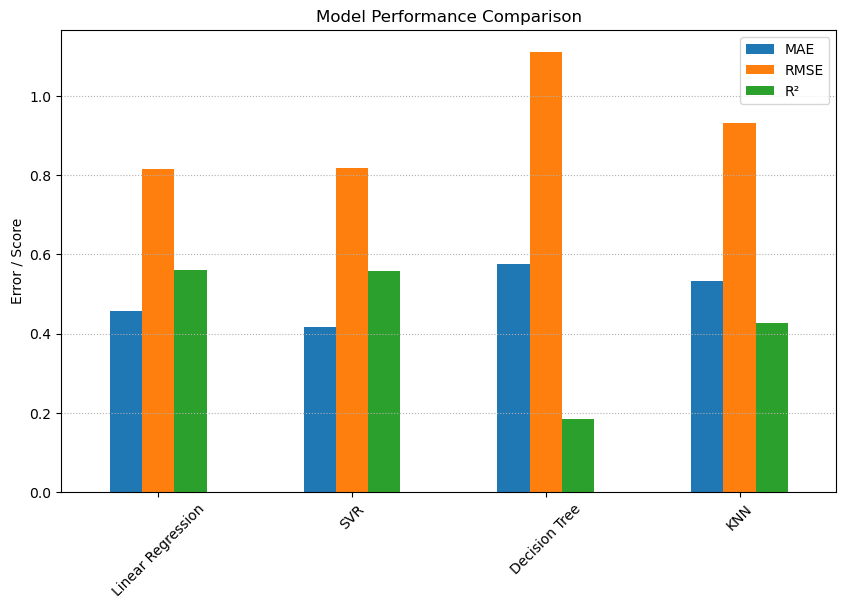

In [37]:
# ==========================
# Plot Performance
# ==========================
res_df = pd.DataFrame(results).T

res_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Error / Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle=":")
plt.show()
